In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing the Dataset
df = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = df.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Label names
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
# Verifying if the images are of equal dimension

print("Shape of train_images: ", train_images.shape)
print("Shape of test_images: ", test_images.shape)

Shape of train_images:  (60000, 28, 28)
Shape of test_images:  (10000, 28, 28)


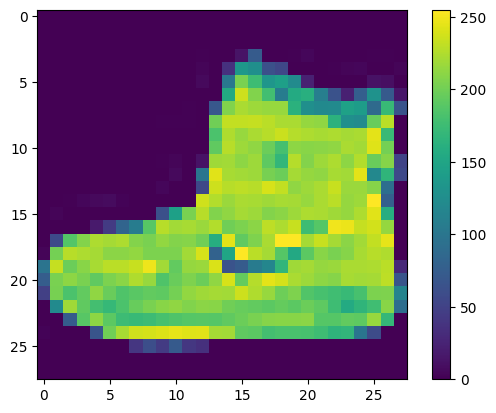

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [ ]:
# Scaling values to range of 0 to 1

train_images = train_images / 255.0
test_images = test_images / 255.0

trainX = train_images.reshape((60000, 28*28))
testX = test_images.reshape((10000, 28*28))

scaler = StandardScaler()

trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)

trainX = trainX.reshape((60000, 28, 28, 1))
testX = testX.reshape((10000, 28, 28, 1))

(60000, 28, 28, 1)

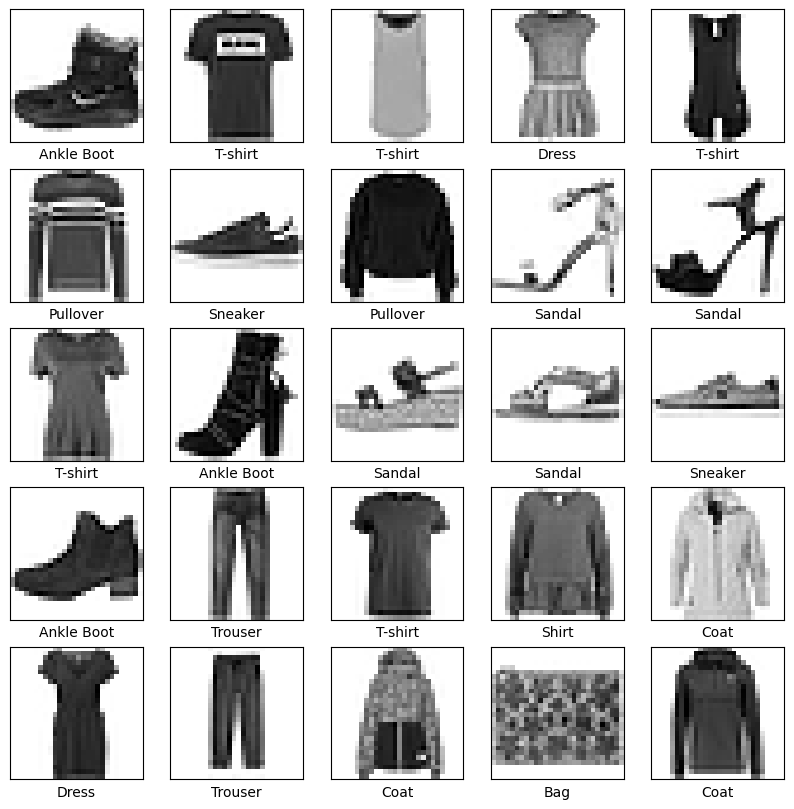

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])

trainX.shape

In [ ]:
# Building the CNN architecture

model = keras.Sequential([
                          keras.layers.Conv2D(input_shape=(28,28,1), filters=64, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Dropout(0.35),
                          keras.layers.Flatten(),
                          keras.layers.Dense(10, activation=tf.nn.softmax),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [ ]:
# Compiling the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model

history = model.fit(trainX, train_labels, epochs=30, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 7s 145us/sample - loss: 0.4493 - acc: 0.8418 - val_loss: 0.3345 - val_acc: 0.8823
Epoch 2/30
48000/48000 [==============================] - 6s 132us/sample - loss: 0.3183 - acc: 0.8879 - val_loss: 0.2881 - val_acc: 0.8970
Epoch 3/30
48000/48000 [==============================] - 6s 132us/sample - loss: 0.2795 - acc: 0.9003 - val_loss: 0.2595 - val_acc: 0.9056
Epoch 4/30
48000/48000 [==============================] - 6s 130us/sample - loss: 0.2557 - acc: 0.9087 - val_loss: 0.2516 - val_acc: 0.9103
Epoch 5/30
48000/48000 [==============================] - 6s 132us/sample - loss: 0.2378 - acc: 0.9140 - val_loss: 0.2560 - val_acc: 0.9107
Epoch 6/30
48000/48000 [==============================] - 6s 131us/sample - loss: 0.2258 - acc: 0.9188 - val_loss: 0.2472 - val_acc: 0.9122
Epoch 7/30
48000/48000 [==============================] - 6s 130us/sample - loss: 0.2140 - acc: 0.9219 - val_l

In [ ]:
# Model Metrics

test_loss, test_acc = model.evaluate(testX, test_labels)

print("3 Layer CNN - Training Loss: ", history.history['loss'][-1]*100)
print("3 Layer CNN - Training Accuracy: ", history.history['acc'][-1]*100)
print("\n")

print("3 Layer CNN - Validation Loss: ", history.history['val_loss'][-1]*100)
print("3 Layer CNN - Validation Accuracy: ", history.history['val_acc'][-1]*100)
print("\n")

print("3 Layer CNN - Test Loss: ", test_loss*100)
print("3 Layer CNN - Test Accuracy: ", test_acc*100)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

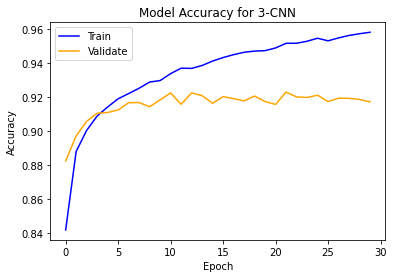

In [ ]:
# Plotting Model Accuracy

plt.plot(history.history['acc'], 'blue')
plt.plot(history.history['val_acc'], 'orange')
plt.title("Model Accuracy for 3-CNN")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

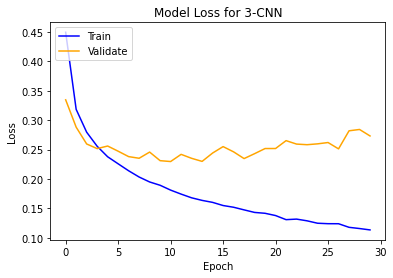

In [ ]:
# Plotting Model Loss

plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'orange')
plt.title("Model Loss for 3-CNN")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

In [ ]:
pred = model.predict_classes(testX)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=pred).numpy()

In [ ]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index=class_names, columns=class_names)

In [ ]:
import seaborn as sns

In [ ]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
import sklearn.metrics as skm
print("\t\t\t\tMETRICS")
print(skm.classification_report(test_labels, pred, digits=3))